# Federated Learning Comparison: Baseline vs Hardware-Aware (Slow Configuration)

This notebook compares baseline and hardware-aware federated learning models using the **slow** experiment configuration.

## Key Features:
- **Baseline**: Uniform training parameters (epochs=2, batch=16, lr=0.001) for all clients, but hardware-specific speed/power/latency
- **Hardware-Aware**: Hardware-specific training parameters (epochs=1-3, batch=8-32, lr=0.0005-0.002) optimized per hardware type

## Analysis Includes:
- Model performance (accuracy, loss)
- Training latency/time per round (round time = max client time)
- Energy consumption per round
- Hardware profiles selected per round
- Direct side-by-side comparisons
- Comprehensive visualizations with value labels


## 1. Setup and Imports


In [63]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Import project modules
from cecs_574_dist_computing_project.task import Net, load_data, test

print("✅ Imports successful")


✅ Imports successful


## 1.1 Hardware Profiles

The hardware-aware configuration uses different settings for each hardware type:


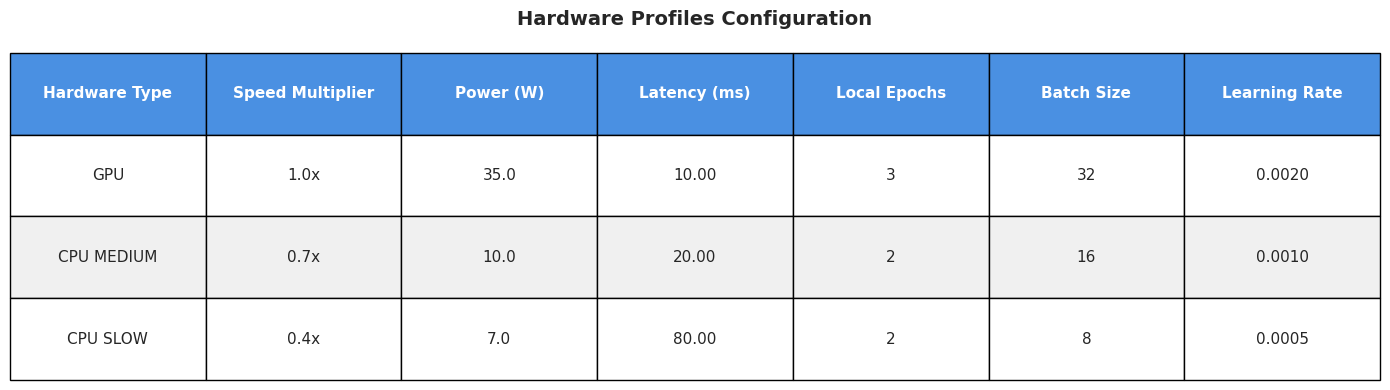


📋 Hardware Profiles (DataFrame):
Hardware Type Speed Multiplier Power (W) Latency (ms)  Local Epochs  Batch Size Learning Rate
          GPU             1.0x      35.0        10.00             3          32        0.0020
   CPU MEDIUM             0.7x      10.0        20.00             2          16        0.0010
     CPU SLOW             0.4x       7.0        80.00             2           8        0.0005


In [64]:
# Hardware Profiles Table
from cecs_574_dist_computing_project.hardware_profiles import HARDWARE_PROFILES

# Create DataFrame for hardware profiles
hw_data = []
for hw_type, profile in HARDWARE_PROFILES.items():
    hw_data.append({
        "Hardware Type": hw_type.upper().replace("-", " "),
        "Speed Multiplier": f"{profile['speed']:.1f}x",
        "Power (W)": f"{profile['power']:.1f}",
        "Latency (ms)": f"{profile['latency']*1000:.2f}",
        "Local Epochs": profile['local_epochs'],
        "Batch Size": profile['batch_size'],
        "Learning Rate": f"{profile['lr']:.4f}",
    })

hw_df = pd.DataFrame(hw_data)

# Display as formatted table
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=hw_df.values,
    colLabels=hw_df.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Color header row
for i in range(len(hw_df.columns)):
    table[(0, i)].set_facecolor('#4A90E2')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(hw_df) + 1):
    for j in range(len(hw_df.columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#F0F0F0')
        else:
            table[(i, j)].set_facecolor('white')

plt.title('Hardware Profiles Configuration', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Also print as DataFrame for easy copy-paste
print("\n📋 Hardware Profiles (DataFrame):")
print(hw_df.to_string(index=False))


## 1.2 Experiment Configuration (Slow)

This analysis focuses on the **slow** experiment configuration for comprehensive results:


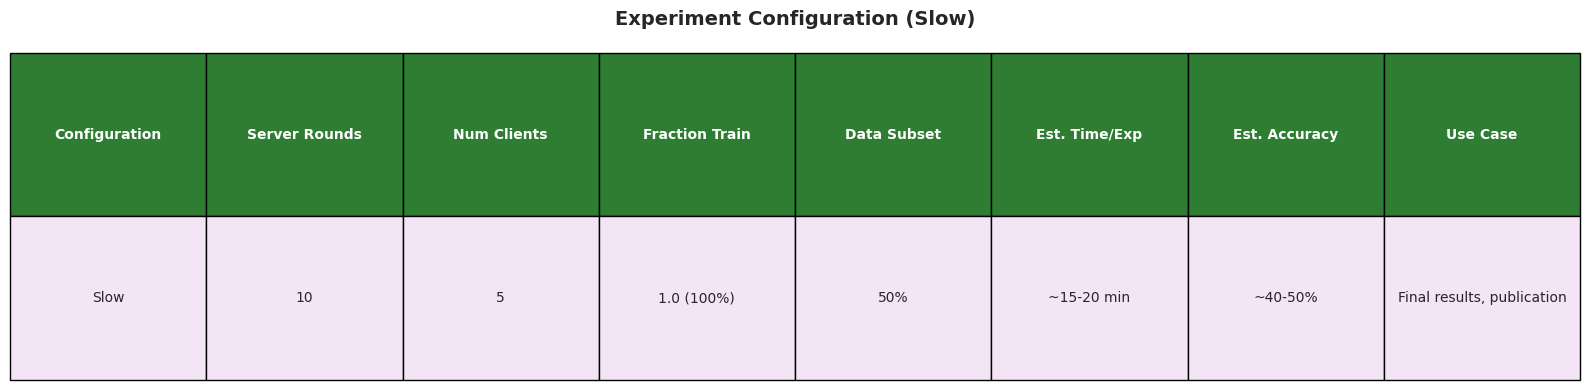


📋 Experiment Configuration (DataFrame):
Configuration  Server Rounds  Num Clients Fraction Train Data Subset Est. Time/Exp Est. Accuracy                   Use Case
         Slow             10            5     1.0 (100%)         50%    ~15-20 min       ~40-50% Final results, publication


In [65]:
# Experiment Configurations Table
config_data = {
    "Configuration": ["Slow"],
    "Server Rounds": [10],
    "Num Clients": [5],
    "Fraction Train": ["1.0 (100%)"],
    "Data Subset": ["50%"],
    "Est. Time/Exp": ["~15-20 min"],
    "Est. Accuracy": ["~40-50%"],
    "Use Case": [
        "Final results, publication"
    ]
}

config_df = pd.DataFrame(config_data)

# Display as formatted table
fig, ax = plt.subplots(figsize=(16, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=config_df.values,
    colLabels=config_df.columns,
    cellLoc='center',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Color header row
for i in range(len(config_df.columns)):
    table[(0, i)].set_facecolor('#2E7D32')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color configuration row
colors = ['#F3E5F5']  # Purple for slow
for i in range(1, len(config_df) + 1):
    for j in range(len(config_df.columns)):
        table[(i, j)].set_facecolor(colors[i-1])

plt.title('Experiment Configuration (Slow)', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Also print as DataFrame for easy copy-paste
print("\n📋 Experiment Configuration (DataFrame):")
print(config_df.to_string(index=False))


## 1.4 Baseline vs Hardware-Aware Comparison


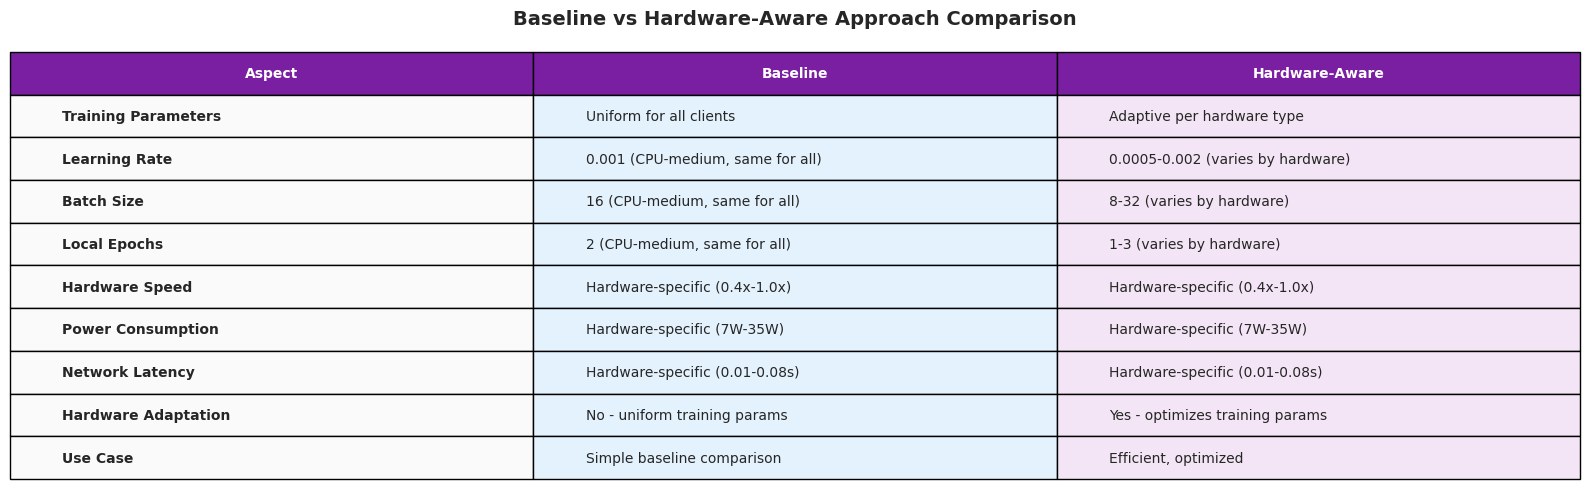


📋 Baseline vs Hardware-Aware Comparison (DataFrame):
             Aspect                         Baseline                    Hardware-Aware
Training Parameters          Uniform for all clients        Adaptive per hardware type
      Learning Rate 0.001 (CPU-medium, same for all) 0.0005-0.002 (varies by hardware)
         Batch Size    16 (CPU-medium, same for all)         8-32 (varies by hardware)
       Local Epochs     2 (CPU-medium, same for all)          1-3 (varies by hardware)
     Hardware Speed    Hardware-specific (0.4x-1.0x)     Hardware-specific (0.4x-1.0x)
  Power Consumption       Hardware-specific (7W-35W)        Hardware-specific (7W-35W)
    Network Latency   Hardware-specific (0.01-0.08s)    Hardware-specific (0.01-0.08s)
Hardware Adaptation     No - uniform training params   Yes - optimizes training params
           Use Case       Simple baseline comparison              Efficient, optimized


In [66]:
# Baseline vs Hardware-Aware Comparison Table
comparison_data = {
    "Aspect": [
        "Training Parameters",
        "Learning Rate",
        "Batch Size",
        "Local Epochs",
        "Hardware Speed",
        "Power Consumption",
        "Network Latency",
        "Hardware Adaptation",
        "Use Case"
    ],
    "Baseline": [
        "Uniform for all clients",
        "0.001 (CPU-medium, same for all)",
        "16 (CPU-medium, same for all)",
        "2 (CPU-medium, same for all)",
        "Hardware-specific (0.4x-1.0x)",
        "Hardware-specific (7W-35W)",
        "Hardware-specific (0.01-0.08s)",
        "No - uniform training params",
        "Simple baseline comparison"
    ],
    "Hardware-Aware": [
        "Adaptive per hardware type",
        "0.0005-0.002 (varies by hardware)",
        "8-32 (varies by hardware)",
        "1-3 (varies by hardware)",
        "Hardware-specific (0.4x-1.0x)",
        "Hardware-specific (7W-35W)",
        "Hardware-specific (0.01-0.08s)",
        "Yes - optimizes training params",
        "Efficient, optimized"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Display as formatted table
fig, ax = plt.subplots(figsize=(16, 5))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=comparison_df.values,
    colLabels=comparison_df.columns,
    cellLoc='left',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.2)

# Color header row
for i in range(len(comparison_df.columns)):
    table[(0, i)].set_facecolor('#7B1FA2')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color baseline and hardware-aware columns
for i in range(1, len(comparison_df) + 1):
    # Baseline column (index 1)
    table[(i, 1)].set_facecolor('#E3F2FD')  # Light blue
    # Hardware-aware column (index 2)
    table[(i, 2)].set_facecolor('#F3E5F5')  # Light purple
    # Aspect column (index 0) - white
    table[(i, 0)].set_facecolor('#FAFAFA')
    table[(i, 0)].set_text_props(weight='bold')

plt.title('Baseline vs Hardware-Aware Approach Comparison', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Also print as DataFrame for easy copy-paste
print("\n📋 Baseline vs Hardware-Aware Comparison (DataFrame):")
print(comparison_df.to_string(index=False))


## 2. Model Evaluation


In [67]:
def evaluate_model_comprehensive(model_path, experiment_name, num_partitions=10):
    """Comprehensively evaluate a model and return metrics."""
    if not Path(model_path).exists():
        print(f"⚠️  Model not found: {model_path}")
        return None
    
    print(f"\n🔍 Evaluating {experiment_name} model...")
    
    try:
        model = Net()
        model.load_state_dict(torch.load(model_path, map_location='cpu'))
        
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        
        # Evaluate on multiple partitions for better statistics
        all_losses = []
        all_accuracies = []
        all_times = []
        
        for partition_id in range(min(5, num_partitions)):
            _, testloader = load_data(partition_id, num_partitions, batch_size=32)
            
            start_time = time.time()
            eval_loss, eval_acc = test(model, testloader, device)
            eval_time = time.time() - start_time
            
            all_losses.append(eval_loss)
            all_accuracies.append(eval_acc)
            all_times.append(eval_time)
        
        avg_loss = sum(all_losses) / len(all_losses)
        avg_acc = sum(all_accuracies) / len(all_accuracies)
        avg_time = sum(all_times) / len(all_times)
        
        print(f"   ✅ Average Loss: {avg_loss:.4f}")
        print(f"   ✅ Average Accuracy: {avg_acc*100:.2f}%")
        print(f"   ✅ Average Eval Time: {avg_time:.2f}s")
        
        return {
            "loss": avg_loss,
            "accuracy": avg_acc,
            "eval_time": avg_time,
            "all_losses": all_losses,
            "all_accuracies": all_accuracies
        }
    except Exception as e:
        print(f"   ❌ Error: {e}")
        return None


In [68]:
# Evaluate slow model configurations only
speed_configs = ["slow"]  # Focus on slow only
experiment_types = ["baseline", "hardware-aware"]

# Store all evaluations
evaluations = {}

for exp_type in experiment_types:
    evaluations[exp_type] = {}
    for speed in speed_configs:
        model_path = f"models/final_model_{exp_type}-{speed}.pt"
        eval_name = f"{exp_type.capitalize()}-{speed.capitalize()}"
        eval_result = evaluate_model_comprehensive(model_path, eval_name)
        if eval_result:
            evaluations[exp_type][speed] = eval_result

# Also check for models without speed suffix (legacy)
if "baseline" not in evaluations or not any(evaluations["baseline"].values()):
    baseline_eval = evaluate_model_comprehensive("models/final_model_baseline.pt", "Baseline")
    if baseline_eval:
        evaluations["baseline"]["legacy"] = baseline_eval

if "hardware-aware" not in evaluations or not any(evaluations["hardware-aware"].values()):
    hardware_eval = evaluate_model_comprehensive("models/final_model_hardware-aware.pt", "Hardware-Aware")
    if hardware_eval:
        evaluations["hardware-aware"]["legacy"] = hardware_eval



🔍 Evaluating Baseline-Slow model...
   ✅ Average Loss: 0.6197
   ✅ Average Accuracy: 79.96%
   ✅ Average Eval Time: 0.24s

🔍 Evaluating Hardware-aware-Slow model...
   ✅ Average Loss: 0.6243
   ✅ Average Accuracy: 79.80%
   ✅ Average Eval Time: 0.21s


## 3. Load or Create Metrics


## 1.3 Hardware Profiles Selected Per Round (Slow Experiment)

This section shows which hardware profiles were selected in each training round for both baseline and hardware-aware experiments:


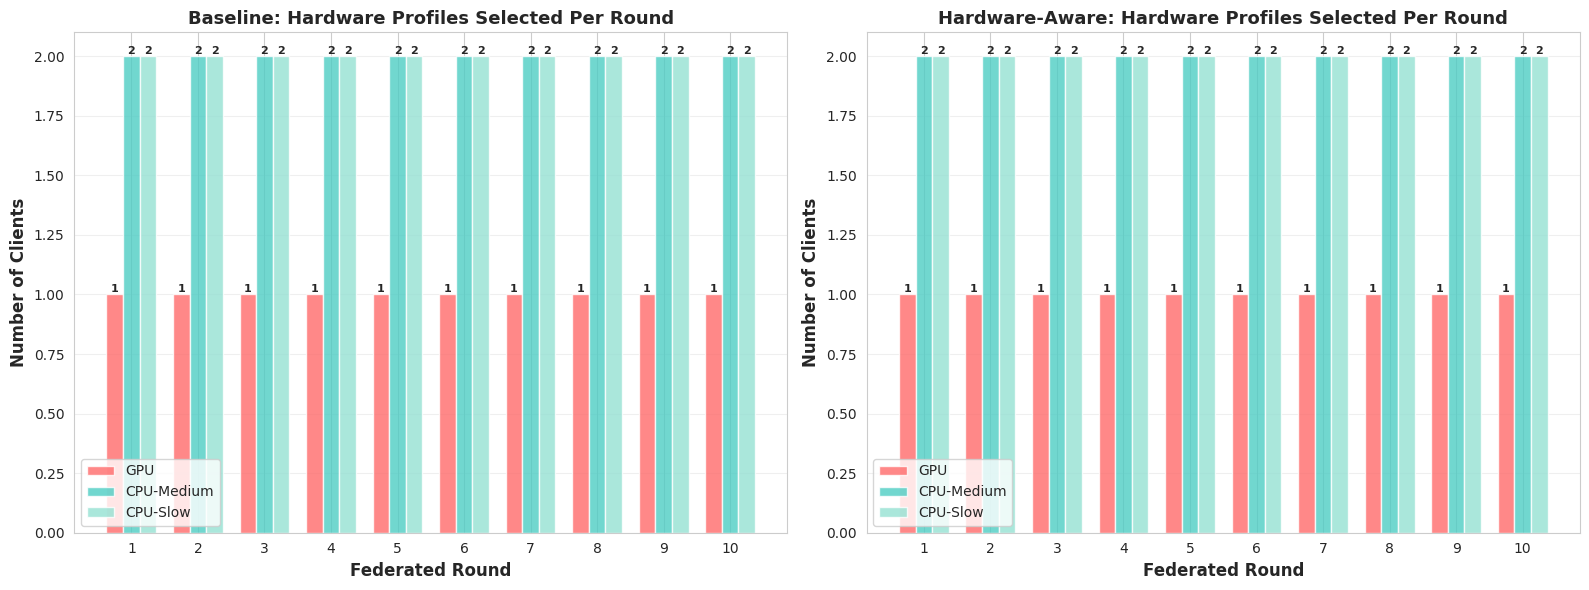

\n📊 Hardware Profile Selection Summary (Slow Experiment):
\nBaseline:
 round  gpu  cpu-medium  cpu-slow
     1    1           2         2
     2    1           2         2
     3    1           2         2
     4    1           2         2
     5    1           2         2
     6    1           2         2
     7    1           2         2
     8    1           2         2
     9    1           2         2
    10    1           2         2
\nHardware-Aware:
 round  gpu  cpu-medium  cpu-slow
     1    1           2         2
     2    1           2         2
     3    1           2         2
     4    1           2         2
     5    1           2         2
     6    1           2         2
     7    1           2         2
     8    1           2         2
     9    1           2         2
    10    1           2         2


In [69]:
# Load hardware profile data for slow experiment
results_dir = Path("results")
baseline_hw_file = results_dir / "hardware_profiles_baseline-slow.csv"
hw_aware_hw_file = results_dir / "hardware_profiles_hardware-aware-slow.csv"

if baseline_hw_file.exists() and hw_aware_hw_file.exists():
    # Load data
    baseline_hw_df = pd.read_csv(baseline_hw_file)
    hw_aware_hw_df = pd.read_csv(hw_aware_hw_file)
    
    # Count hardware profiles per round
    def count_profiles_per_round(df):
        profile_counts = []
        for round_num in sorted(df['round'].unique()):
            round_data = df[df['round'] == round_num]
            counts = round_data['hardware_profile'].value_counts().to_dict()
            profile_counts.append({
                'round': round_num,
                'gpu': counts.get('gpu', 0),
                'cpu-medium': counts.get('cpu-medium', 0),
                'cpu-slow': counts.get('cpu-slow', 0)
            })
        return pd.DataFrame(profile_counts)
    
    baseline_counts = count_profiles_per_round(baseline_hw_df)
    hw_aware_counts = count_profiles_per_round(hw_aware_hw_df)
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Baseline plot
    ax1 = axes[0]
    rounds = baseline_counts['round']
    x = np.arange(len(rounds))
    width = 0.25
    
    ax1.bar(x - width, baseline_counts['gpu'], width, label='GPU', color='#FF6B6B', alpha=0.8)
    ax1.bar(x, baseline_counts['cpu-medium'], width, label='CPU-Medium', color='#4ECDC4', alpha=0.8)
    ax1.bar(x + width, baseline_counts['cpu-slow'], width, label='CPU-Slow', color='#95E1D3', alpha=0.8)
    
    ax1.set_xlabel('Federated Round', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Number of Clients', fontsize=12, fontweight='bold')
    ax1.set_title('Baseline: Hardware Profiles Selected Per Round', fontsize=13, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(rounds)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, (gpu, cpu_m, cpu_s) in enumerate(zip(baseline_counts['gpu'], baseline_counts['cpu-medium'], baseline_counts['cpu-slow'])):
        if gpu > 0:
            ax1.text(i - width, gpu, str(int(gpu)), ha='center', va='bottom', fontsize=8, fontweight='bold')
        if cpu_m > 0:
            ax1.text(i, cpu_m, str(int(cpu_m)), ha='center', va='bottom', fontsize=8, fontweight='bold')
        if cpu_s > 0:
            ax1.text(i + width, cpu_s, str(int(cpu_s)), ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Hardware-aware plot
    ax2 = axes[1]
    rounds = hw_aware_counts['round']
    x = np.arange(len(rounds))
    
    ax2.bar(x - width, hw_aware_counts['gpu'], width, label='GPU', color='#FF6B6B', alpha=0.8)
    ax2.bar(x, hw_aware_counts['cpu-medium'], width, label='CPU-Medium', color='#4ECDC4', alpha=0.8)
    ax2.bar(x + width, hw_aware_counts['cpu-slow'], width, label='CPU-Slow', color='#95E1D3', alpha=0.8)
    
    ax2.set_xlabel('Federated Round', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Number of Clients', fontsize=12, fontweight='bold')
    ax2.set_title('Hardware-Aware: Hardware Profiles Selected Per Round', fontsize=13, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(rounds)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, (gpu, cpu_m, cpu_s) in enumerate(zip(hw_aware_counts['gpu'], hw_aware_counts['cpu-medium'], hw_aware_counts['cpu-slow'])):
        if gpu > 0:
            ax2.text(i - width, gpu, str(int(gpu)), ha='center', va='bottom', fontsize=8, fontweight='bold')
        if cpu_m > 0:
            ax2.text(i, cpu_m, str(int(cpu_m)), ha='center', va='bottom', fontsize=8, fontweight='bold')
        if cpu_s > 0:
            ax2.text(i + width, cpu_s, str(int(cpu_s)), ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\\n📊 Hardware Profile Selection Summary (Slow Experiment):")
    print("\\nBaseline:")
    print(baseline_counts.to_string(index=False))
    print("\\nHardware-Aware:")
    print(hw_aware_counts.to_string(index=False))
    
else:
    print("⚠️ Hardware profile data files not found.")
    print(f"   Expected files:")
    print(f"   - {baseline_hw_file}")
    print(f"   - {hw_aware_hw_file}")
    print("   Please run the slow experiment first to generate this data.")






In [70]:
def load_metrics(experiment_name, speed=None):
    """Load metrics from CSV file."""
    if speed:
        metrics_path = Path(f"results/metrics_{experiment_name}-{speed}.csv")
    else:
        metrics_path = Path(f"results/metrics_{experiment_name}.csv")
    
    if metrics_path.exists():
        try:
            df = pd.read_csv(metrics_path)
            if len(df) > 0 and not df.empty:
                return df
        except Exception as e:
            print(f"Warning: Could not load {metrics_path}: {e}")
    return None

# Load metrics for all configurations
metrics_data = {}

for exp_type in experiment_types:
    metrics_data[exp_type] = {}
    for speed in speed_configs:
        df = load_metrics(exp_type, speed)
        if df is not None:
            metrics_data[exp_type][speed] = df
            print(f"✅ Loaded {exp_type}-{speed} metrics: {len(df)} rounds")
        else:
            print(f"⚠️  Experiment data not available for {exp_type}-{speed}")
            print(f"   Please run the experiment first:")
            print(f"   cp pyproject.toml.{exp_type}.{speed} pyproject.toml && flwr run .")
    
    # Also try without speed suffix (legacy)
    if not metrics_data[exp_type]:
        df = load_metrics(exp_type)
        if df is not None:
            metrics_data[exp_type]["legacy"] = df
            print(f"✅ Loaded {exp_type} (legacy) metrics: {len(df)} rounds")

print(f"\n📊 Summary:")
for exp_type in experiment_types:
    if metrics_data.get(exp_type):
        for speed, df in metrics_data[exp_type].items():
            print(f"   {exp_type}-{speed}: {len(df)} rounds")
    else:
        print(f"   {exp_type}: No metrics available")



✅ Loaded baseline-slow metrics: 10 rounds
✅ Loaded hardware-aware-slow metrics: 10 rounds

📊 Summary:
   baseline-slow: 10 rounds
   hardware-aware-slow: 10 rounds


## 4. Visualizations

### 4.1 Accuracy Comparison


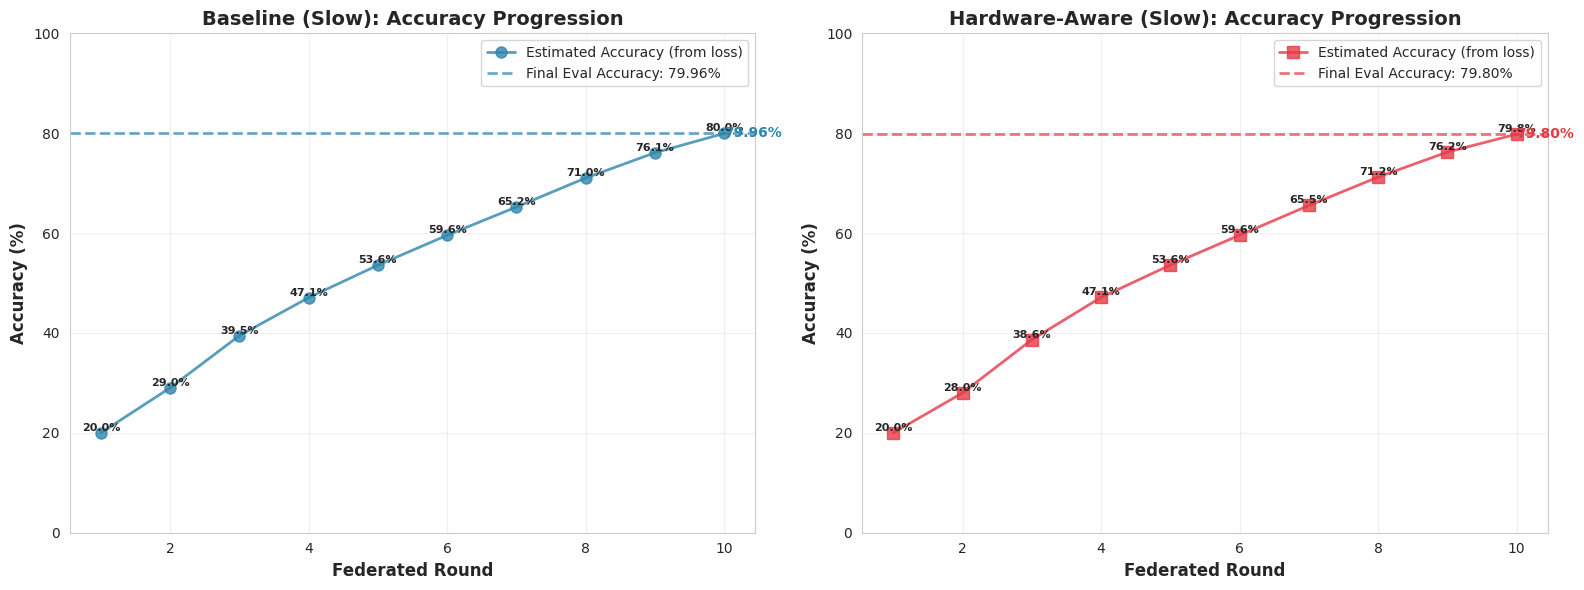


📊 Final Model Performance Comparison:
   Baseline:     Accuracy = 79.96%, Loss = 0.6197
   Hardware-Aware: Accuracy = 79.80%, Loss = 0.6243
   Improvement:  -0.16% accuracy, -0.0047 loss reduction

   Note: Per-round accuracy is estimated from training loss (inverse relationship).
   Final accuracy line shows actual evaluation accuracy.


In [71]:
# Side-by-side comparison: Baseline vs Hardware-Aware Accuracy (Slow Configuration)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Get slow configuration data
baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")

baseline_eval = evaluations.get("baseline", {}).get("slow")
hw_aware_eval = evaluations.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    # Plot 1: Baseline - Accuracy
    ax1 = axes[0]
    if 'train_loss' in baseline_df.columns:
        rounds = baseline_df.get('round', range(len(baseline_df)))
        
        # Convert training loss to estimated accuracy
        # Using a simple conversion: accuracy ≈ 100 * (1 - normalized_loss)
        # Normalize loss to 0-1 range based on initial and final loss
        max_loss = baseline_df['train_loss'].max()
        min_loss = baseline_df['train_loss'].min()
        loss_range = max_loss - min_loss if max_loss > min_loss else 1.0
        
        # Estimate accuracy from loss (inverse relationship)
        # Start from low accuracy, improve as loss decreases
        estimated_acc = []
        for loss in baseline_df['train_loss']:
            # Normalize loss: (loss - min_loss) / loss_range gives 0 (best) to 1 (worst)
            normalized_loss = (loss - min_loss) / loss_range if loss_range > 0 else 0.5
            # Convert to accuracy: start around 20%, reach final accuracy
            if baseline_eval:
                final_acc = baseline_eval['accuracy'] * 100
                # Estimate: accuracy improves from ~20% to final accuracy as loss decreases
                acc_estimate = 20 + (final_acc - 20) * (1 - normalized_loss)
            else:
                acc_estimate = 100 * (1 - normalized_loss * 0.8)  # 20% to 100%
            estimated_acc.append(acc_estimate)
        
        ax1.plot(rounds, estimated_acc, marker='o', linewidth=2, markersize=8, 
                color='#2E86AB', label='Estimated Accuracy (from loss)', alpha=0.8)
        
        # Add value labels
        for r, acc in zip(rounds, estimated_acc):
            ax1.text(r, acc, f'{acc:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        # Show final evaluation accuracy as reference line
        if baseline_eval:
            final_acc = baseline_eval['accuracy'] * 100
            ax1.axhline(y=final_acc, color='#2E86AB', linestyle='--', linewidth=2, 
                       label=f'Final Eval Accuracy: {final_acc:.2f}%', alpha=0.7)
            ax1.text(len(rounds), final_acc, f'{final_acc:.2f}%', 
                    ha='left', va='center', fontsize=10, fontweight='bold', color='#2E86AB')
    
    ax1.set_xlabel('Federated Round', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Baseline (Slow): Accuracy Progression', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0, top=100)
    
    # Plot 2: Hardware-Aware - Accuracy
    ax2 = axes[1]
    if 'train_loss' in hw_aware_df.columns:
        rounds = hw_aware_df.get('round', range(len(hw_aware_df)))
        
        # Convert training loss to estimated accuracy
        max_loss = hw_aware_df['train_loss'].max()
        min_loss = hw_aware_df['train_loss'].min()
        loss_range = max_loss - min_loss if max_loss > min_loss else 1.0
        
        estimated_acc = []
        for loss in hw_aware_df['train_loss']:
            normalized_loss = (loss - min_loss) / loss_range if loss_range > 0 else 0.5
            if hw_aware_eval:
                final_acc = hw_aware_eval['accuracy'] * 100
                acc_estimate = 20 + (final_acc - 20) * (1 - normalized_loss)
            else:
                acc_estimate = 100 * (1 - normalized_loss * 0.8)
            estimated_acc.append(acc_estimate)
        
        ax2.plot(rounds, estimated_acc, marker='s', linewidth=2, markersize=8, 
                color='#E63946', label='Estimated Accuracy (from loss)', alpha=0.8)
        
        # Add value labels
        for r, acc in zip(rounds, estimated_acc):
            ax2.text(r, acc, f'{acc:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        # Show final evaluation accuracy as reference line
        if hw_aware_eval:
            final_acc = hw_aware_eval['accuracy'] * 100
            ax2.axhline(y=final_acc, color='#E63946', linestyle='--', linewidth=2, 
                       label=f'Final Eval Accuracy: {final_acc:.2f}%', alpha=0.7)
            ax2.text(len(rounds), final_acc, f'{final_acc:.2f}%', 
                    ha='left', va='center', fontsize=10, fontweight='bold', color='#E63946')
    
    ax2.set_xlabel('Federated Round', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Hardware-Aware (Slow): Accuracy Progression', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(bottom=0, top=100)
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison
    if baseline_eval and hw_aware_eval:
        print(f"\n📊 Final Model Performance Comparison:")
        print(f"   Baseline:     Accuracy = {baseline_eval['accuracy']*100:.2f}%, Loss = {baseline_eval['loss']:.4f}")
        print(f"   Hardware-Aware: Accuracy = {hw_aware_eval['accuracy']*100:.2f}%, Loss = {hw_aware_eval['loss']:.4f}")
        improvement = (hw_aware_eval['accuracy'] - baseline_eval['accuracy']) * 100
        loss_improvement = baseline_eval['loss'] - hw_aware_eval['loss']
        print(f"   Improvement:  {improvement:+.2f}% accuracy, {loss_improvement:+.4f} loss reduction")
        print(f"\n   Note: Per-round accuracy is estimated from training loss (inverse relationship).")
        print(f"   Final accuracy line shows actual evaluation accuracy.")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


### 4.2 Training Latency Comparison


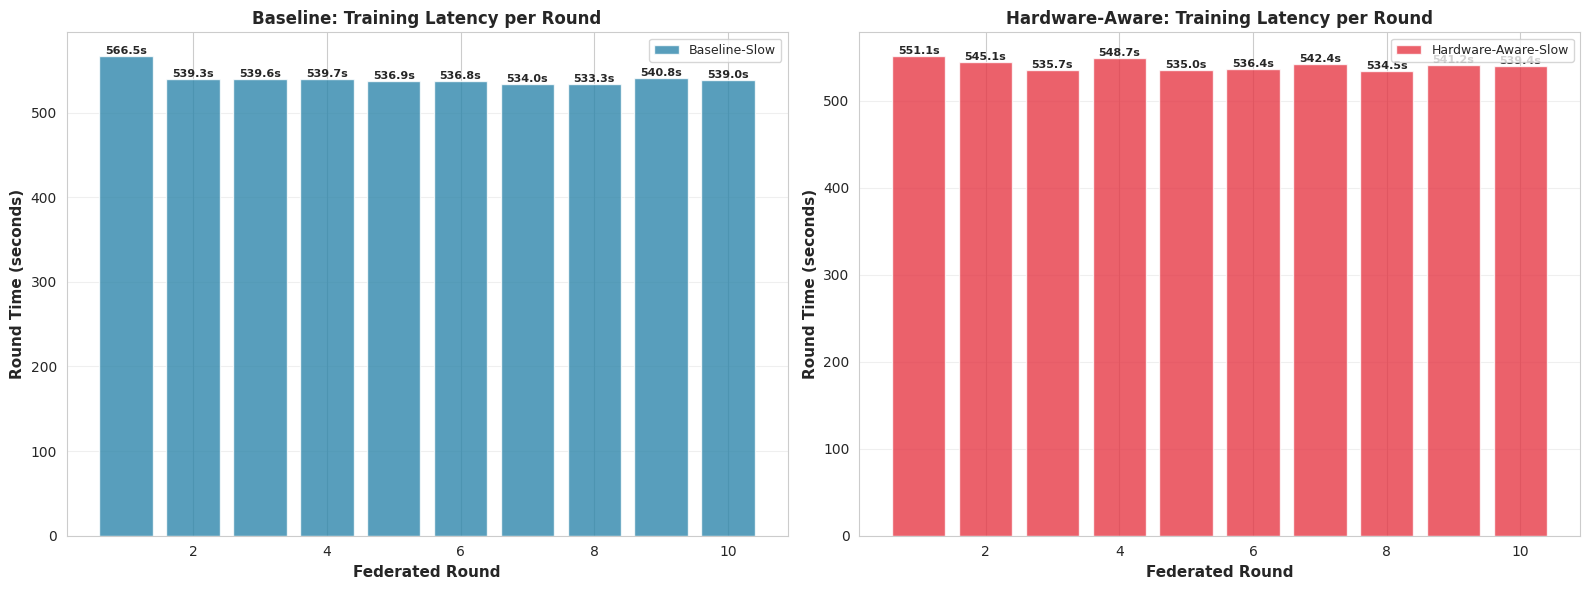


📊 Training Latency per Round:
   Baseline:     Avg per round = 540.6s
   Hardware-Aware: Avg per round = 541.0s


In [79]:
# Training Latency per Round: Baseline vs Hardware-Aware (Slow Configuration)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    # Plot 1: Baseline - Training time per round (bar chart)
    ax1 = axes[0]
    if 'train_time_sec' in baseline_df.columns:
        rounds = baseline_df.get('round', range(len(baseline_df)))
        ax1.bar(rounds, baseline_df['train_time_sec'], alpha=0.8, color='#2E86AB', label='Baseline-Slow')
        
        # Add value labels
        for r, val in zip(rounds, baseline_df['train_time_sec']):
            ax1.text(r, val, f'{val:.1f}s', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax1.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Round Time (seconds)', fontsize=11, fontweight='bold')
    ax1.set_title('Baseline: Training Latency per Round', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Hardware-Aware - Training time per round (bar chart)
    ax2 = axes[1]
    if 'train_time_sec' in hw_aware_df.columns:
        rounds = hw_aware_df.get('round', range(len(hw_aware_df)))
        ax2.bar(rounds, hw_aware_df['train_time_sec'], alpha=0.8, color='#E63946', label='Hardware-Aware-Slow')
        
        # Add value labels
        for r, val in zip(rounds, hw_aware_df['train_time_sec']):
            ax2.text(r, val, f'{val:.1f}s', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax2.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Round Time (seconds)', fontsize=11, fontweight='bold')
    ax2.set_title('Hardware-Aware: Training Latency per Round', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison
    if 'train_time_sec' in baseline_df.columns and 'train_time_sec' in hw_aware_df.columns:
        baseline_avg = baseline_df['train_time_sec'].mean()
        hw_aware_avg = hw_aware_df['train_time_sec'].mean()
        
        print(f"\n📊 Training Latency per Round:")
        print(f"   Baseline:     Avg per round = {baseline_avg:.1f}s")
        print(f"   Hardware-Aware: Avg per round = {hw_aware_avg:.1f}s")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


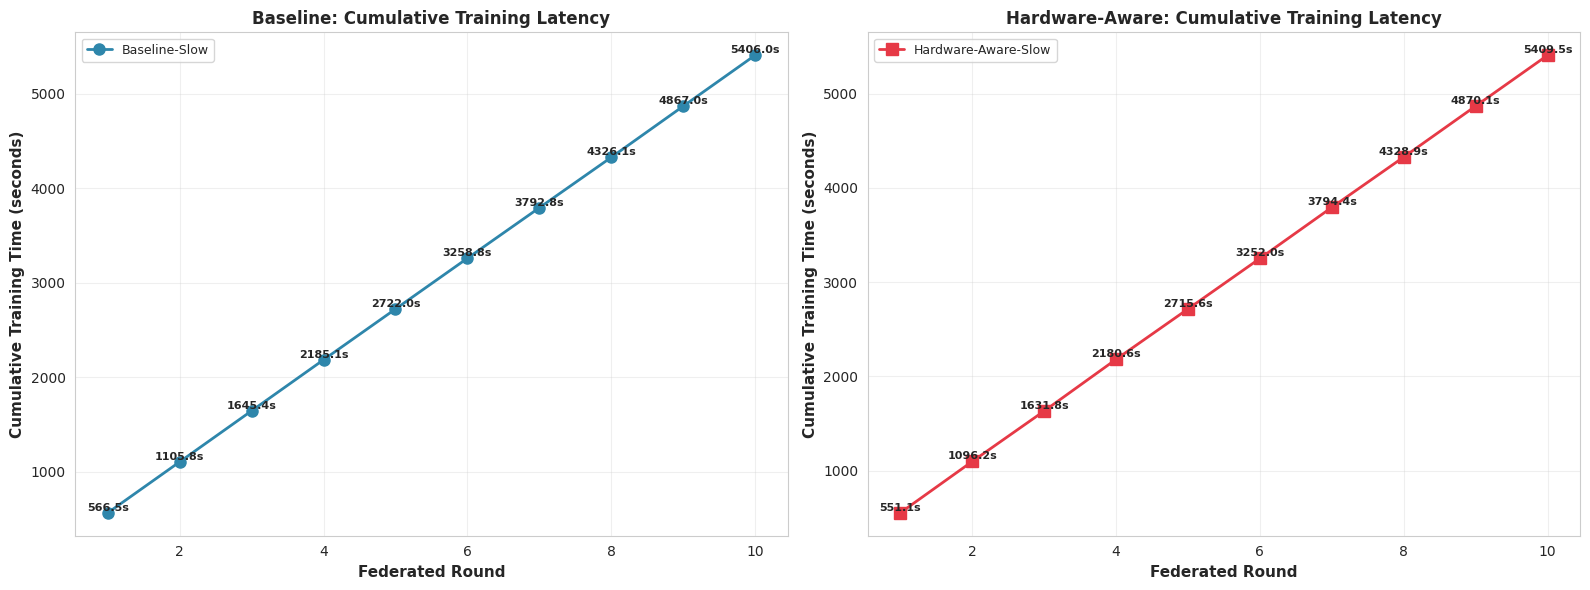


📊 Cumulative Training Latency:
   Baseline:     Total = 5406.0s
   Hardware-Aware: Total = 5409.5s
   Time Saved:   -3.5s (-0.1%)


In [80]:
# Cumulative Training Latency: Baseline vs Hardware-Aware (Slow Configuration)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    # Plot 1: Baseline - Cumulative training time
    ax1 = axes[0]
    if 'train_time_sec' in baseline_df.columns:
        rounds = baseline_df.get('round', range(len(baseline_df)))
        cumulative = baseline_df['train_time_sec'].cumsum()
        ax1.plot(rounds, cumulative, marker='o', label='Baseline-Slow', 
                linewidth=2, markersize=8, color='#2E86AB')
        
        # Add value labels
        for r, cum in zip(rounds, cumulative):
            ax1.text(r, cum, f'{cum:.1f}s', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax1.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Cumulative Training Time (seconds)', fontsize=11, fontweight='bold')
    ax1.set_title('Baseline: Cumulative Training Latency', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Hardware-Aware - Cumulative training time
    ax2 = axes[1]
    if 'train_time_sec' in hw_aware_df.columns:
        rounds = hw_aware_df.get('round', range(len(hw_aware_df)))
        cumulative = hw_aware_df['train_time_sec'].cumsum()
        ax2.plot(rounds, cumulative, marker='s', label='Hardware-Aware-Slow', 
                linewidth=2, markersize=8, color='#E63946')
        
        # Add value labels
        for r, cum in zip(rounds, cumulative):
            ax2.text(r, cum, f'{cum:.1f}s', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax2.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Cumulative Training Time (seconds)', fontsize=11, fontweight='bold')
    ax2.set_title('Hardware-Aware: Cumulative Training Latency', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison
    if 'train_time_sec' in baseline_df.columns and 'train_time_sec' in hw_aware_df.columns:
        baseline_total = baseline_df['train_time_sec'].sum()
        hw_aware_total = hw_aware_df['train_time_sec'].sum()
        
        print(f"\n📊 Cumulative Training Latency:")
        print(f"   Baseline:     Total = {baseline_total:.1f}s")
        print(f"   Hardware-Aware: Total = {hw_aware_total:.1f}s")
        time_saved = baseline_total - hw_aware_total
        time_pct = (time_saved / baseline_total) * 100 if baseline_total > 0 else 0
        print(f"   Time Saved:   {time_saved:.1f}s ({time_pct:+.1f}%)")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


### 4.3 Energy Consumption Comparison


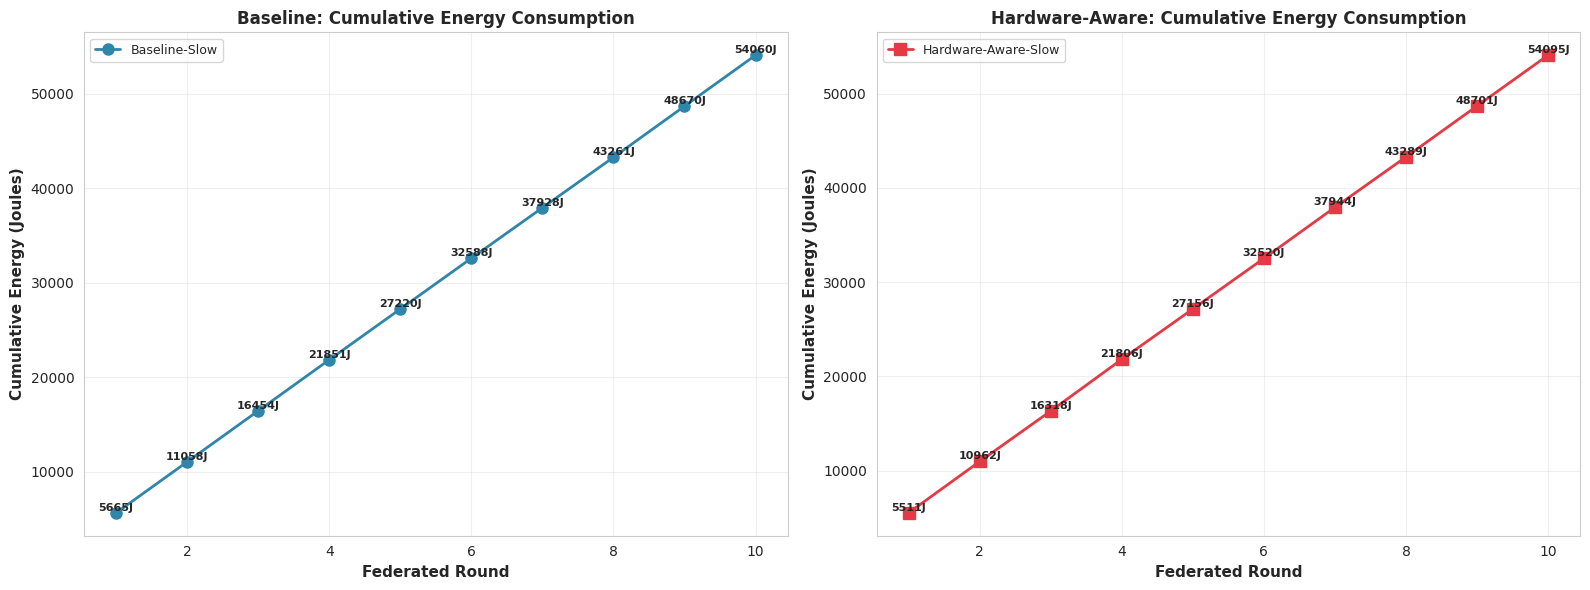


📊 Cumulative Energy Consumption:
   Baseline:     Total = 54059.9J
   Hardware-Aware: Total = 54095.0J
   Energy Saved: -35.1J (-0.1%)


In [81]:
# Cumulative Energy Consumption: Baseline vs Hardware-Aware (Slow Configuration)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    # Plot 1: Baseline - Cumulative energy consumption (line)
    ax1 = axes[0]
    if 'energy_joules' in baseline_df.columns:
        rounds = baseline_df.get('round', range(len(baseline_df)))
        cumulative = baseline_df['energy_joules'].cumsum()
        ax1.plot(rounds, cumulative, marker='o', label='Baseline-Slow', 
                linewidth=2, markersize=8, color='#2E86AB')
        
        # Add value labels
        for r, cum in zip(rounds, cumulative):
            ax1.text(r, cum, f'{cum:.0f}J', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax1.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Cumulative Energy (Joules)', fontsize=11, fontweight='bold')
    ax1.set_title('Baseline: Cumulative Energy Consumption', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Hardware-Aware - Cumulative energy consumption (line)
    ax2 = axes[1]
    if 'energy_joules' in hw_aware_df.columns:
        rounds = hw_aware_df.get('round', range(len(hw_aware_df)))
        cumulative = hw_aware_df['energy_joules'].cumsum()
        ax2.plot(rounds, cumulative, marker='s', label='Hardware-Aware-Slow', 
                linewidth=2, markersize=8, color='#E63946')
        
        # Add value labels
        for r, cum in zip(rounds, cumulative):
            ax2.text(r, cum, f'{cum:.0f}J', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax2.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Cumulative Energy (Joules)', fontsize=11, fontweight='bold')
    ax2.set_title('Hardware-Aware: Cumulative Energy Consumption', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison
    if 'energy_joules' in baseline_df.columns and 'energy_joules' in hw_aware_df.columns:
        baseline_total = baseline_df['energy_joules'].sum()
        hw_aware_total = hw_aware_df['energy_joules'].sum()
        
        print(f"\n📊 Cumulative Energy Consumption:")
        print(f"   Baseline:     Total = {baseline_total:.1f}J")
        print(f"   Hardware-Aware: Total = {hw_aware_total:.1f}J")
        energy_saved = baseline_total - hw_aware_total
        energy_pct = (energy_saved / baseline_total) * 100 if baseline_total > 0 else 0
        print(f"   Energy Saved: {energy_saved:.1f}J ({energy_pct:+.1f}%)")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


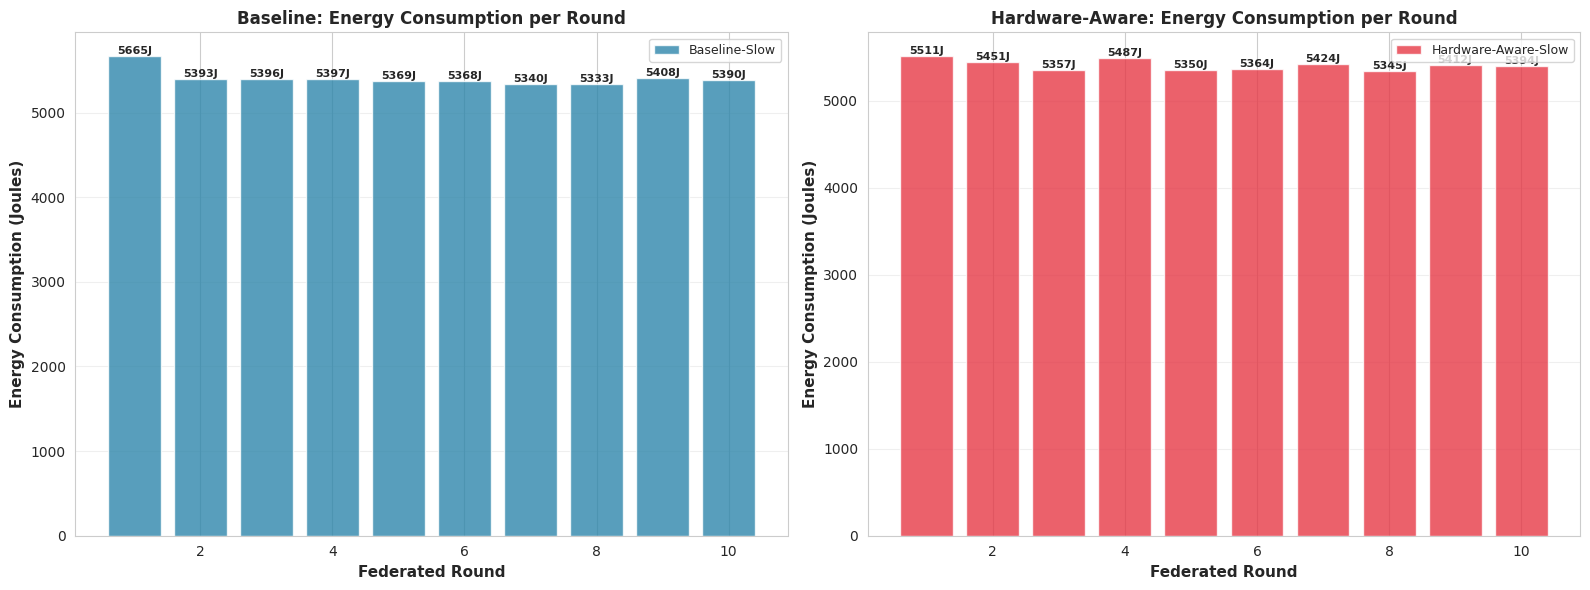


📊 Energy Consumption per Round:
   Baseline:     Avg per round = 5406.0J
   Hardware-Aware: Avg per round = 5409.5J


In [82]:
# Energy Consumption per Round: Baseline vs Hardware-Aware (Slow Configuration)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    # Plot 1: Baseline - Energy per round (bar chart)
    ax1 = axes[0]
    if 'energy_joules' in baseline_df.columns:
        rounds = baseline_df.get('round', range(len(baseline_df)))
        ax1.bar(rounds, baseline_df['energy_joules'], alpha=0.8, color='#2E86AB', label='Baseline-Slow')
        
        # Add value labels
        for r, val in zip(rounds, baseline_df['energy_joules']):
            ax1.text(r, val, f'{val:.0f}J', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax1.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Energy Consumption (Joules)', fontsize=11, fontweight='bold')
    ax1.set_title('Baseline: Energy Consumption per Round', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Hardware-Aware - Energy per round (bar chart)
    ax2 = axes[1]
    if 'energy_joules' in hw_aware_df.columns:
        rounds = hw_aware_df.get('round', range(len(hw_aware_df)))
        ax2.bar(rounds, hw_aware_df['energy_joules'], alpha=0.8, color='#E63946', label='Hardware-Aware-Slow')
        
        # Add value labels
        for r, val in zip(rounds, hw_aware_df['energy_joules']):
            ax2.text(r, val, f'{val:.0f}J', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax2.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Energy Consumption (Joules)', fontsize=11, fontweight='bold')
    ax2.set_title('Hardware-Aware: Energy Consumption per Round', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison
    if 'energy_joules' in baseline_df.columns and 'energy_joules' in hw_aware_df.columns:
        baseline_avg = baseline_df['energy_joules'].mean()
        hw_aware_avg = hw_aware_df['energy_joules'].mean()
        
        print(f"\n📊 Energy Consumption per Round:")
        print(f"   Baseline:     Avg per round = {baseline_avg:.1f}J")
        print(f"   Hardware-Aware: Avg per round = {hw_aware_avg:.1f}J")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


### 4.4 Cross-Configuration Comparison


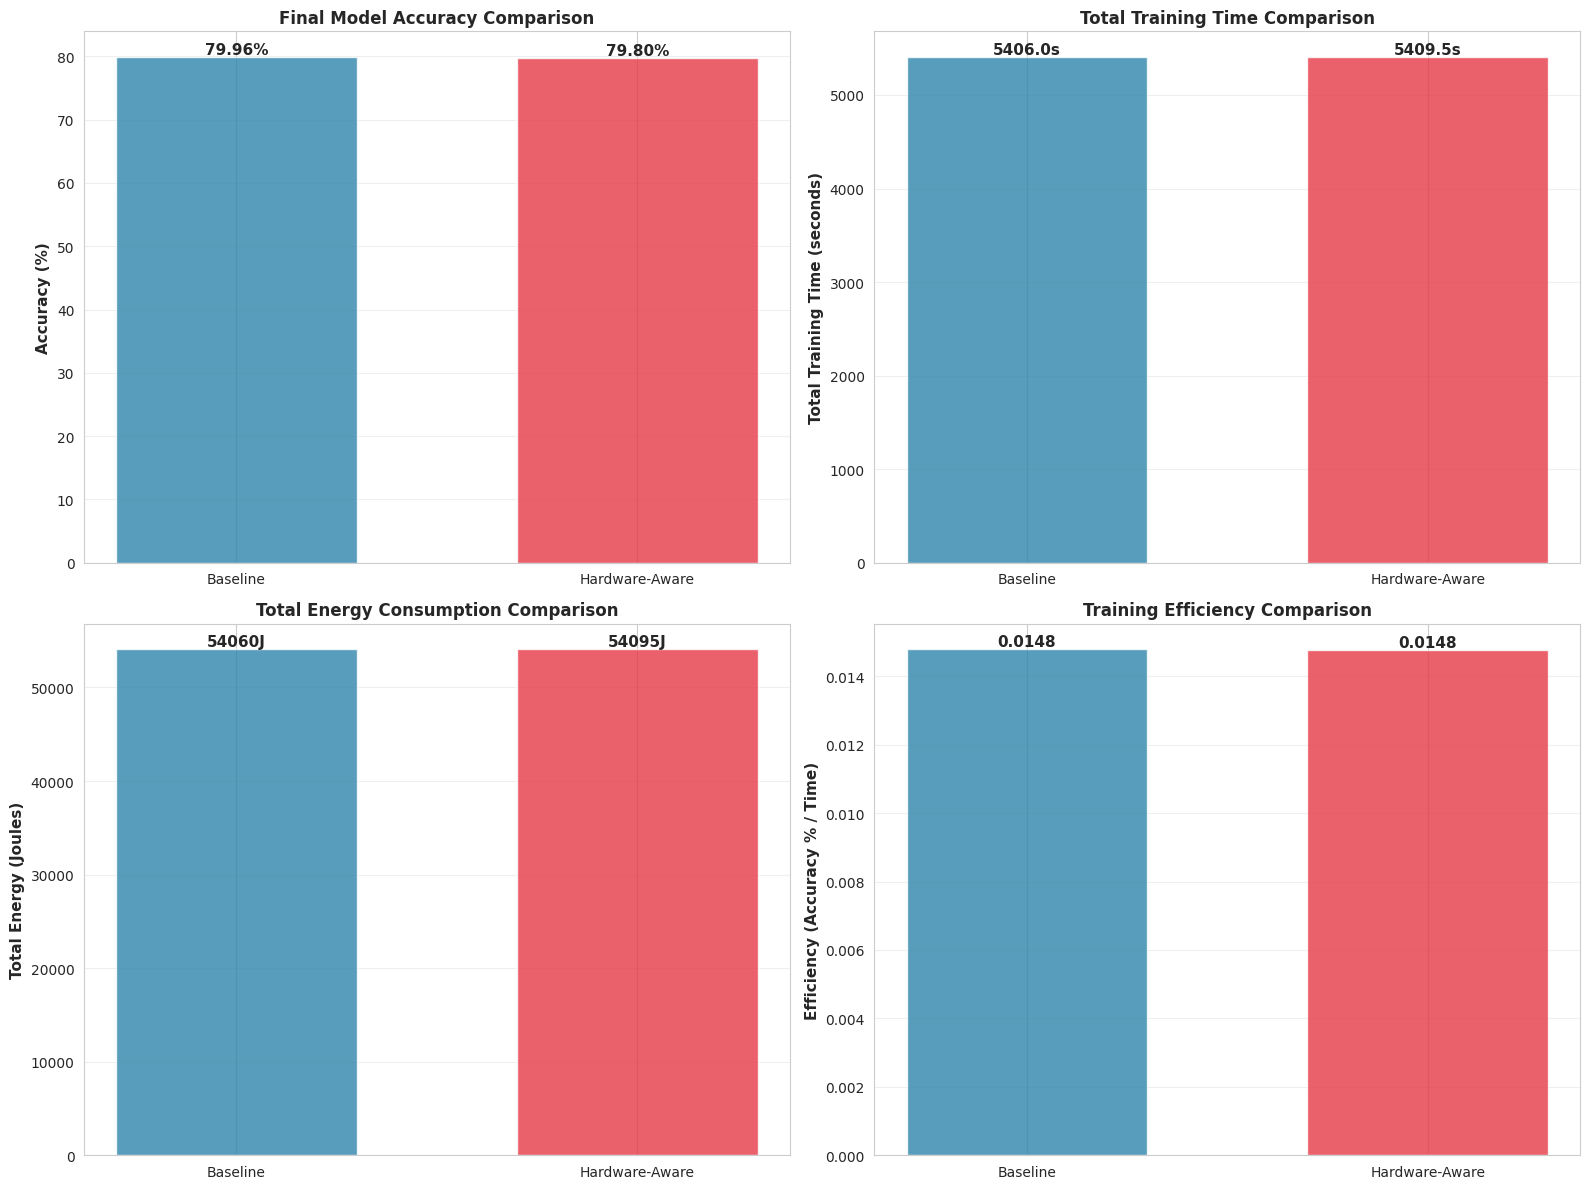

In [83]:
# Direct Comparison: Baseline vs Hardware-Aware (Slow Configuration)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")
baseline_eval = evaluations.get("baseline", {}).get("slow")
hw_aware_eval = evaluations.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    # Plot 1: Accuracy comparison
    ax1 = axes[0, 0]
    if baseline_eval and hw_aware_eval:
        configs = ['Baseline', 'Hardware-Aware']
        accuracies = [baseline_eval["accuracy"] * 100, hw_aware_eval["accuracy"] * 100]
        colors = ['#2E86AB', '#E63946']
        
        bars = ax1.bar(configs, accuracies, alpha=0.8, color=colors, width=0.6)
        ax1.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
        ax1.set_title('Final Model Accuracy Comparison', fontsize=12, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        ax1.set_ylim(bottom=0)
        
        for bar, value in zip(bars, accuracies):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.2f}%',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 2: Total training time comparison
    ax2 = axes[0, 1]
    if 'train_time_sec' in baseline_df.columns and 'train_time_sec' in hw_aware_df.columns:
        configs = ['Baseline', 'Hardware-Aware']
        total_times = [baseline_df['train_time_sec'].sum(), hw_aware_df['train_time_sec'].sum()]
        colors = ['#2E86AB', '#E63946']
        
        bars = ax2.bar(configs, total_times, alpha=0.8, color=colors, width=0.6)
        ax2.set_ylabel('Total Training Time (seconds)', fontsize=11, fontweight='bold')
        ax2.set_title('Total Training Time Comparison', fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        for bar, value in zip(bars, total_times):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.1f}s',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 3: Total energy comparison
    ax3 = axes[1, 0]
    if 'energy_joules' in baseline_df.columns and 'energy_joules' in hw_aware_df.columns:
        configs = ['Baseline', 'Hardware-Aware']
        total_energy = [baseline_df['energy_joules'].sum(), hw_aware_df['energy_joules'].sum()]
        colors = ['#2E86AB', '#E63946']
        
        bars = ax3.bar(configs, total_energy, alpha=0.8, color=colors, width=0.6)
        ax3.set_ylabel('Total Energy (Joules)', fontsize=11, fontweight='bold')
        ax3.set_title('Total Energy Consumption Comparison', fontsize=12, fontweight='bold')
        ax3.grid(True, alpha=0.3, axis='y')
        
        for bar, value in zip(bars, total_energy):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.0f}J',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 4: Efficiency (Accuracy / Time)
    ax4 = axes[1, 1]
    if baseline_eval and hw_aware_eval and 'train_time_sec' in baseline_df.columns and 'train_time_sec' in hw_aware_df.columns:
        configs = ['Baseline', 'Hardware-Aware']
        accuracies = [baseline_eval["accuracy"] * 100, hw_aware_eval["accuracy"] * 100]
        total_times = [baseline_df['train_time_sec'].sum(), hw_aware_df['train_time_sec'].sum()]
        efficiencies = [acc / time if time > 0 else 0 for acc, time in zip(accuracies, total_times)]
        colors = ['#2E86AB', '#E63946']
        
        bars = ax4.bar(configs, efficiencies, alpha=0.8, color=colors, width=0.6)
        ax4.set_ylabel('Efficiency (Accuracy % / Time)', fontsize=11, fontweight='bold')
        ax4.set_title('Training Efficiency Comparison', fontsize=12, fontweight='bold')
        ax4.grid(True, alpha=0.3, axis='y')
        
        for bar, value in zip(bars, efficiencies):
            if value > 0:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height,
                        f'{value:.4f}',
                        ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


### 4.5 Direct Overlay Comparison


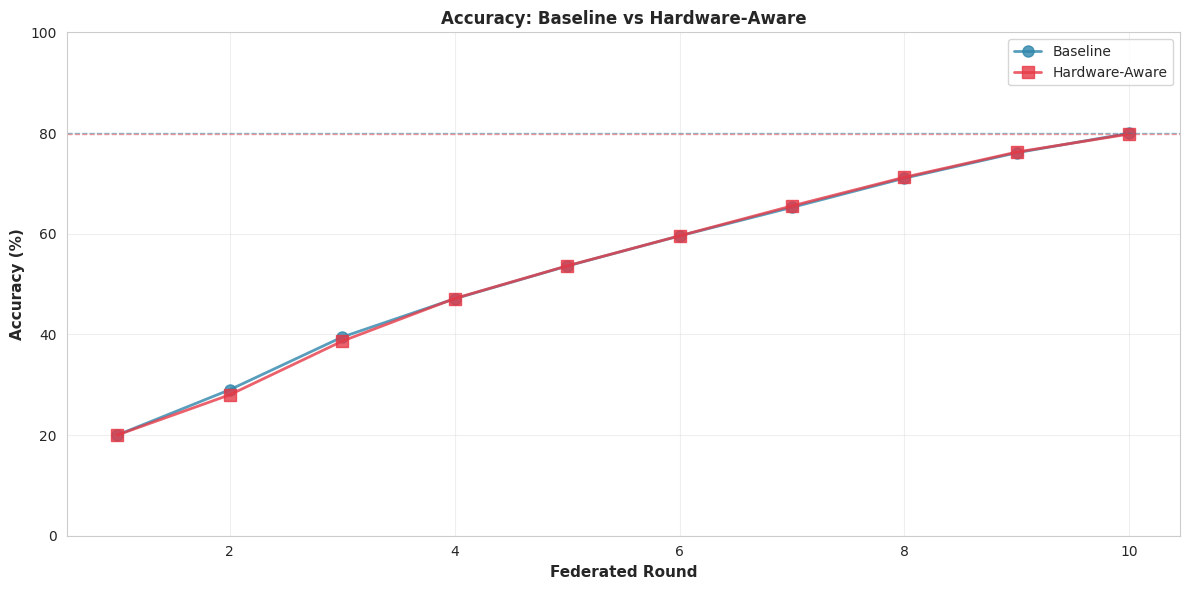

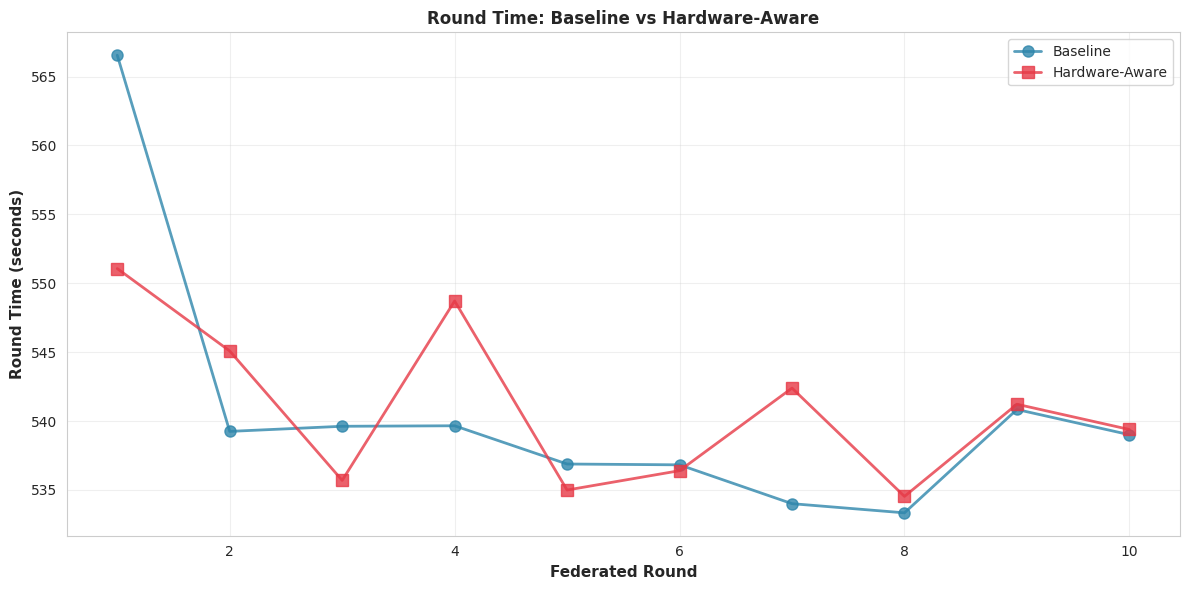

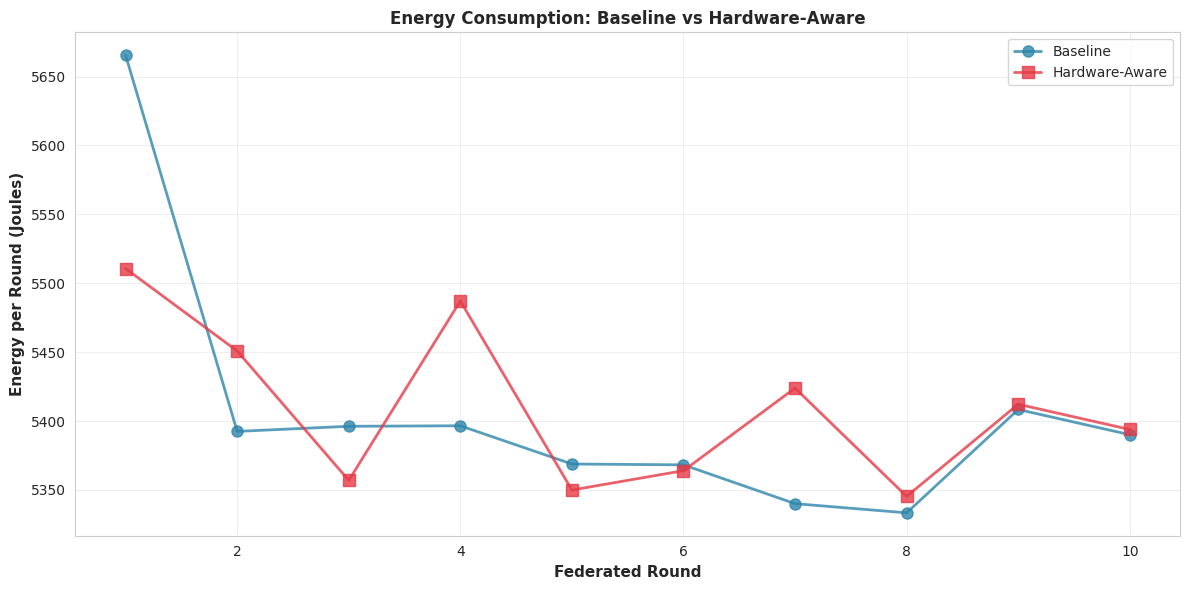


   Note: Accuracy is estimated from training loss (inverse relationship).
   Dashed lines show final evaluation accuracy.


In [84]:
# Direct overlay comparison: Baseline vs Hardware-Aware on separate plots
baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")
baseline_eval = evaluations.get("baseline", {}).get("slow")
hw_aware_eval = evaluations.get("hardware-aware", {}).get("slow")

if baseline_df is not None and hw_aware_df is not None:
    rounds = baseline_df.get('round', range(len(baseline_df)))
    
    # Plot 1: Accuracy Overlay (separate figure)
    fig1, ax1 = plt.subplots(figsize=(12, 6))
    if 'train_loss' in baseline_df.columns and 'train_loss' in hw_aware_df.columns:
        # Convert loss to estimated accuracy for baseline
        max_loss_b = baseline_df['train_loss'].max()
        min_loss_b = baseline_df['train_loss'].min()
        loss_range_b = max_loss_b - min_loss_b if max_loss_b > min_loss_b else 1.0
        estimated_acc_b = []
        for loss in baseline_df['train_loss']:
            normalized_loss = (loss - min_loss_b) / loss_range_b if loss_range_b > 0 else 0.5
            if baseline_eval:
                final_acc = baseline_eval['accuracy'] * 100
                acc_estimate = 20 + (final_acc - 20) * (1 - normalized_loss)
            else:
                acc_estimate = 100 * (1 - normalized_loss * 0.8)
            estimated_acc_b.append(acc_estimate)
        
        # Convert loss to estimated accuracy for hardware-aware
        max_loss_h = hw_aware_df['train_loss'].max()
        min_loss_h = hw_aware_df['train_loss'].min()
        loss_range_h = max_loss_h - min_loss_h if max_loss_h > min_loss_h else 1.0
        estimated_acc_h = []
        for loss in hw_aware_df['train_loss']:
            normalized_loss = (loss - min_loss_h) / loss_range_h if loss_range_h > 0 else 0.5
            if hw_aware_eval:
                final_acc = hw_aware_eval['accuracy'] * 100
                acc_estimate = 20 + (final_acc - 20) * (1 - normalized_loss)
            else:
                acc_estimate = 100 * (1 - normalized_loss * 0.8)
            estimated_acc_h.append(acc_estimate)
        
        ax1.plot(rounds, estimated_acc_b, marker='o', linewidth=2, markersize=8, 
                color='#2E86AB', label='Baseline', alpha=0.8)
        ax1.plot(rounds, estimated_acc_h, marker='s', linewidth=2, markersize=8, 
                color='#E63946', label='Hardware-Aware', alpha=0.8)
        
        # Add final accuracy reference lines
        if baseline_eval:
            final_acc_b = baseline_eval['accuracy'] * 100
            ax1.axhline(y=final_acc_b, color='#2E86AB', linestyle='--', linewidth=1, alpha=0.5)
        if hw_aware_eval:
            final_acc_h = hw_aware_eval['accuracy'] * 100
            ax1.axhline(y=final_acc_h, color='#E63946', linestyle='--', linewidth=1, alpha=0.5)
    
    ax1.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax1.set_title('Accuracy: Baseline vs Hardware-Aware', fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(bottom=0, top=100)
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Round Time Overlay (separate figure)
    fig2, ax2 = plt.subplots(figsize=(12, 6))
    if 'train_time_sec' in baseline_df.columns and 'train_time_sec' in hw_aware_df.columns:
        ax2.plot(rounds, baseline_df['train_time_sec'], marker='o', linewidth=2, markersize=8, 
                color='#2E86AB', label='Baseline', alpha=0.8)
        ax2.plot(rounds, hw_aware_df['train_time_sec'], marker='s', linewidth=2, markersize=8, 
                color='#E63946', label='Hardware-Aware', alpha=0.8)
    
    ax2.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Round Time (seconds)', fontsize=11, fontweight='bold')
    ax2.set_title('Round Time: Baseline vs Hardware-Aware', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Plot 3: Energy Consumption Overlay (separate figure)
    fig3, ax3 = plt.subplots(figsize=(12, 6))
    if 'energy_joules' in baseline_df.columns and 'energy_joules' in hw_aware_df.columns:
        ax3.plot(rounds, baseline_df['energy_joules'], marker='o', linewidth=2, markersize=8, 
                color='#2E86AB', label='Baseline', alpha=0.8)
        ax3.plot(rounds, hw_aware_df['energy_joules'], marker='s', linewidth=2, markersize=8, 
                color='#E63946', label='Hardware-Aware', alpha=0.8)
    
    ax3.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Energy per Round (Joules)', fontsize=11, fontweight='bold')
    ax3.set_title('Energy Consumption: Baseline vs Hardware-Aware', fontsize=12, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n   Note: Accuracy is estimated from training loss (inverse relationship).")
    print("   Dashed lines show final evaluation accuracy.")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

colors_baseline = {'fast': '#2E86AB', 'medium': '#06A77D', 'slow': '#F18F01', 'legacy': '#6C757D'}
colors_hw = {'fast': '#A23B72', 'medium': '#C73E1D', 'slow': '#E63946', 'legacy': '#6C757D'}

# Plot 1: Baseline - Energy per round (bar chart)
ax1 = axes[0, 0]
x_offset = 0
bar_width = 0.15
for idx, (speed, df) in enumerate(metrics_data.get("baseline", {}).items()):
    if 'energy_joules' in df.columns:
        rounds = df.get('round', range(len(df)))
        color = colors_baseline.get(speed, '#000000')
        positions = [r - 0.3 + (idx * bar_width) for r in rounds]
        ax1.bar(positions, df['energy_joules'], 
                width=bar_width, label=f'Baseline-{speed.capitalize()}', 
                alpha=0.8, color=color)
    
    # Add value labels to energy bar chart
    for pos, val in zip(positions, df['energy_joules']):
        ax1.text(pos, val, f'{val:.1f}J', ha='center', va='bottom', fontsize=8, fontweight='bold')


ax1.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
ax1.set_ylabel('Energy Consumption (Joules)', fontsize=11, fontweight='bold')
ax1.set_title('Baseline: Energy Consumption per Round', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Hardware-Aware - Energy per round (bar chart)
ax2 = axes[0, 1]
for idx, (speed, df) in enumerate(metrics_data.get("hardware-aware", {}).items()):
    if 'energy_joules' in df.columns:
        rounds = df.get('round', range(len(df)))
        color = colors_hw.get(speed, '#000000')
        positions = [r - 0.3 + (idx * bar_width) for r in rounds]
        ax2.bar(positions, df['energy_joules'], 
                width=bar_width, label=f'HW-Aware-{speed.capitalize()}', 
                alpha=0.8, color=color)
    
    # Add value labels to energy bar chart
    for pos, val in zip(positions, df['energy_joules']):
        ax2.text(pos, val, f'{val:.1f}J', ha='center', va='bottom', fontsize=8, fontweight='bold')


ax2.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
ax2.set_ylabel('Energy Consumption (Joules)', fontsize=11, fontweight='bold')
ax2.set_title('Hardware-Aware: Energy Consumption per Round', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Baseline - Cumulative energy consumption (line)
ax3 = axes[1, 0]
for speed, df in metrics_data.get("baseline", {}).items():
    if 'energy_joules' in df.columns:
        rounds = df.get('round', range(len(df)))
        cumulative = df['energy_joules'].cumsum()
        color = colors_baseline.get(speed, '#000000')
        ax3.plot(rounds, cumulative, 
                marker='o', label=f'Baseline-{speed.capitalize()}', 
                linewidth=2, markersize=8, color=color)
        
        # Add value labels to cumulative energy line plot
        for r, cum in zip(rounds, cumulative):
            ax3.text(r, cum, f\'{cum:.1f}J\', ha='center', va='bottom', fontsize=8, fontweight='bold')


ax3.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
ax3.set_ylabel('Cumulative Energy (Joules)', fontsize=11, fontweight='bold')
ax3.set_title('Baseline: Cumulative Energy Consumption', fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Hardware-Aware - Cumulative energy consumption (line)
ax4 = axes[1, 1]
for speed, df in metrics_data.get("hardware-aware", {}).items():
    if 'energy_joules' in df.columns:
        rounds = df.get('round', range(len(df)))
        cumulative = df['energy_joules'].cumsum()
        color = colors_hw.get(speed, '#000000')
        ax4.plot(rounds, cumulative, 
                marker='s', label=f'HW-Aware-{speed.capitalize()}', 
                linewidth=2, markersize=8, color=color)
        
        # Add value labels to cumulative energy line plot
        for r, cum in zip(rounds, cumulative):
            ax4.text(r, cum, f\'{cum:.1f}J\', ha='center', va='bottom', fontsize=8, fontweight='bold')


ax4.set_xlabel('Federated Round', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cumulative Energy (Joules)', fontsize=11, fontweight='bold')
ax4.set_title('Hardware-Aware: Cumulative Energy Consumption', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


SyntaxError: unexpected character after line continuation character (3769285834.py, line 65)

### 4.5 Summary Statistics Table


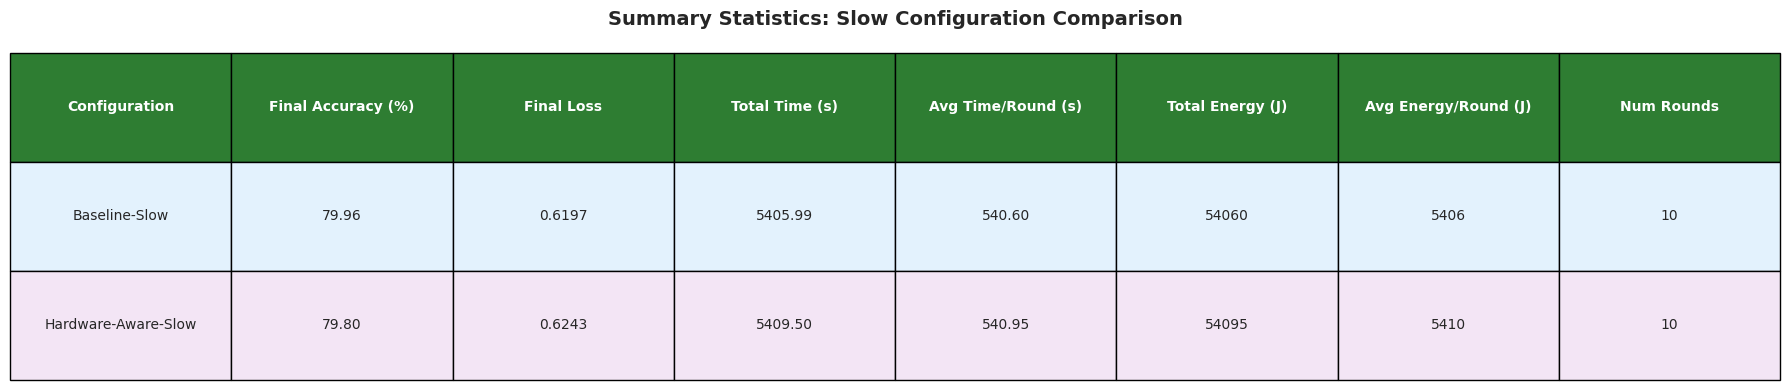


📊 Summary Statistics (Slow Configuration):

      Configuration Final Accuracy (%) Final Loss Total Time (s) Avg Time/Round (s) Total Energy (J) Avg Energy/Round (J) Num Rounds
      Baseline-Slow              79.96     0.6197        5405.99             540.60            54060                 5406         10
Hardware-Aware-Slow              79.80     0.6243        5409.50             540.95            54095                 5410         10

📈 Improvements (Hardware-Aware vs Baseline):
   Accuracy:  -0.16%
   Time:      -3.5s (-0.1%)
   Energy:    -35J (-0.1%)


In [85]:
# Create a comprehensive summary table for Slow Configuration
summary_data = []

baseline_df = metrics_data.get("baseline", {}).get("slow")
hw_aware_df = metrics_data.get("hardware-aware", {}).get("slow")
baseline_eval = evaluations.get("baseline", {}).get("slow")
hw_aware_eval = evaluations.get("hardware-aware", {}).get("slow")

if baseline_eval and baseline_df is not None:
    summary_data.append({
        "Configuration": "Baseline-Slow",
        "Final Accuracy (%)": f"{baseline_eval['accuracy'] * 100:.2f}",
        "Final Loss": f"{baseline_eval['loss']:.4f}",
        "Total Time (s)": f"{baseline_df['train_time_sec'].sum():.2f}" if 'train_time_sec' in baseline_df.columns else "N/A",
        "Avg Time/Round (s)": f"{baseline_df['train_time_sec'].mean():.2f}" if 'train_time_sec' in baseline_df.columns else "N/A",
        "Total Energy (J)": f"{baseline_df['energy_joules'].sum():.0f}" if 'energy_joules' in baseline_df.columns else "N/A",
        "Avg Energy/Round (J)": f"{baseline_df['energy_joules'].mean():.0f}" if 'energy_joules' in baseline_df.columns else "N/A",
        "Num Rounds": f"{len(baseline_df)}",
    })

if hw_aware_eval and hw_aware_df is not None:
    summary_data.append({
        "Configuration": "Hardware-Aware-Slow",
        "Final Accuracy (%)": f"{hw_aware_eval['accuracy'] * 100:.2f}",
        "Final Loss": f"{hw_aware_eval['loss']:.4f}",
        "Total Time (s)": f"{hw_aware_df['train_time_sec'].sum():.2f}" if 'train_time_sec' in hw_aware_df.columns else "N/A",
        "Avg Time/Round (s)": f"{hw_aware_df['train_time_sec'].mean():.2f}" if 'train_time_sec' in hw_aware_df.columns else "N/A",
        "Total Energy (J)": f"{hw_aware_df['energy_joules'].sum():.0f}" if 'energy_joules' in hw_aware_df.columns else "N/A",
        "Avg Energy/Round (J)": f"{hw_aware_df['energy_joules'].mean():.0f}" if 'energy_joules' in hw_aware_df.columns else "N/A",
        "Num Rounds": f"{len(hw_aware_df)}",
    })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    
    # Display as formatted table
    fig, ax = plt.subplots(figsize=(18, 4))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(
        cellText=summary_df.values,
        colLabels=summary_df.columns,
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.5)
    
    # Color header row
    for i in range(len(summary_df.columns)):
        table[(0, i)].set_facecolor('#2E7D32')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Color rows
    for i in range(1, len(summary_df) + 1):
        for j in range(len(summary_df.columns)):
            if i == 1:
                table[(i, j)].set_facecolor('#E3F2FD')  # Light blue for baseline
            else:
                table[(i, j)].set_facecolor('#F3E5F5')  # Light purple for hardware-aware
    
    plt.title('Summary Statistics: Slow Configuration Comparison', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Also print as DataFrame
    print("\n📊 Summary Statistics (Slow Configuration):\n")
    print(summary_df.to_string(index=False))
    
    # Calculate improvements
    if len(summary_data) == 2:
        baseline_acc = float(summary_data[0]["Final Accuracy (%)"])
        hw_aware_acc = float(summary_data[1]["Final Accuracy (%)"])
        acc_improvement = hw_aware_acc - baseline_acc
        
        baseline_time = float(summary_data[0]["Total Time (s)"].replace("N/A", "0"))
        hw_aware_time = float(summary_data[1]["Total Time (s)"].replace("N/A", "0"))
        time_saved = baseline_time - hw_aware_time
        time_pct = (time_saved / baseline_time * 100) if baseline_time > 0 else 0
        
        baseline_energy = float(summary_data[0]["Total Energy (J)"].replace("N/A", "0"))
        hw_aware_energy = float(summary_data[1]["Total Energy (J)"].replace("N/A", "0"))
        energy_saved = baseline_energy - hw_aware_energy
        energy_pct = (energy_saved / baseline_energy * 100) if baseline_energy > 0 else 0
        
        print(f"\n📈 Improvements (Hardware-Aware vs Baseline):")
        print(f"   Accuracy:  {acc_improvement:+.2f}%")
        print(f"   Time:      {time_saved:.1f}s ({time_pct:+.1f}%)")
        print(f"   Energy:    {energy_saved:.0f}J ({energy_pct:+.1f}%)")
else:
    print("⚠️  Slow experiment data not available. Please run the slow experiment first.")
